In [19]:
import pandas as pd
df=pd.read_csv('BPD_Victim_Based_Crime_Data.csv')
df.head()

FileNotFoundError: [Errno 2] File b'BPD_Victim_Based_Crime_Data.csv' does not exist: b'BPD_Victim_Based_Crime_Data.csv'

In [20]:
df.rename(columns={'CrimeDate':'Date', 'CrimeTime':'Time', 'CrimeCode':'Code', 'vri_name1':'VRI', 'Inside/Outside':'Inside_Outside', 'Age':'Offender_Age', 'Sex':'Offender_Sex','Race':'Offender_Race'}, inplace=True)
df=df.drop(columns=['Location 1','Total Incidents'])
df=df[['Date', 'Time', 'Code', 'Description', 'Offender_Age', 'Offender_Sex', 'Offender_Race', 'Weapon', 'Location', 'Post', 'District', 'Neighborhood', 'Inside_Outside', 'Premise', 'Latitude', 'Longitude', 'VRI']]
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'])
df['Time']=df['Time'].dt.time
df[['Latitude', 'Longitude', 'Offender_Age']]=df[['Latitude', 'Longitude', 'Offender_Age']].apply(pd.to_numeric)
df[['Post']]=df[['Post']].astype('object')

KeyError: "['Location 1' 'Total Incidents'] not found in axis"

In [12]:
df.dtypes

Date              datetime64[ns]
Time                      object
Code                      object
Description               object
Offender_Age             float64
Offender_Sex              object
Offender_Race             object
Weapon                    object
Location                  object
Post                      object
District                  object
Neighborhood              object
Inside_Outside            object
Premise                   object
Latitude                 float64
Longitude                float64
VRI                       object
dtype: object

In [13]:
df.Time.fillna(0, inplace=True)
df.Offender_Age.fillna('NA', inplace=True)
df.Weapon.fillna('NA', inplace=True)
df.Location.fillna('NA', inplace=True)
df.Post.fillna('NA', inplace=True)
df.Neighborhood.fillna('NA', inplace=True)
df.Inside_Outside.fillna('NA', inplace=True)
df.Premise.fillna('NA', inplace=True)
df.Latitude.fillna('NA', inplace=True)
df.Longitude.fillna('NA', inplace=True)
import numpy as np
df.Latitude = np.where(df.Longitude.eq('NA'), 'NA', df.Latitude)
df.Longitude = np.where(df.Latitude.eq('NA'), 'NA', df.Longitude)
df.VRI.fillna('NA', inplace=True)

In [14]:
df['Description'].replace(['AGG. ASSAULT', 'COMMON ASSAULT'],['ASSAULT - AGGRAVATED', 'ASSAULT - COMMON'], inplace=True)
df['Description'].unique()

array(['ASSAULT - AGGRAVATED', 'ASSAULT - COMMON', 'LARCENY',
       'ROBBERY - RESIDENCE', 'LARCENY FROM AUTO', 'ROBBERY - STREET',
       'BURGLARY', 'AUTO THEFT', 'ROBBERY - CARJACKING',
       'ROBBERY - COMMERCIAL', 'SHOOTING', 'HOMICIDE', 'ARSON', 'RAPE'],
      dtype=object)

In [15]:
crimeDesc=list(df['Description'].unique())
crimeDesc=[d.split(' ', 1)[0] if d!='AUTO THEFT' else d for d in crimeDesc]
crimeDesc=list(dict.fromkeys(crimeDesc))
df=pd.concat([df, df.Description.str.findall('|'.join(crimeDesc)).str[0].str.get_dummies()], axis=1)

In [16]:
count_df=pd.DataFrame([(column, df[column].sum()) for column in crimeDesc], columns=['Crime', 'Count'])
count_df

,Crime,Count
0,ASSAULT,40963
1,LARCENY,48587
2,ROBBERY,16363
3,BURGLARY,19286
4,AUTO THEFT,12268
5,SHOOTING,2075
6,HOMICIDE,948
7,ARSON,481
8,RAPE,949


ValueError: color kwarg must have one color per dataset

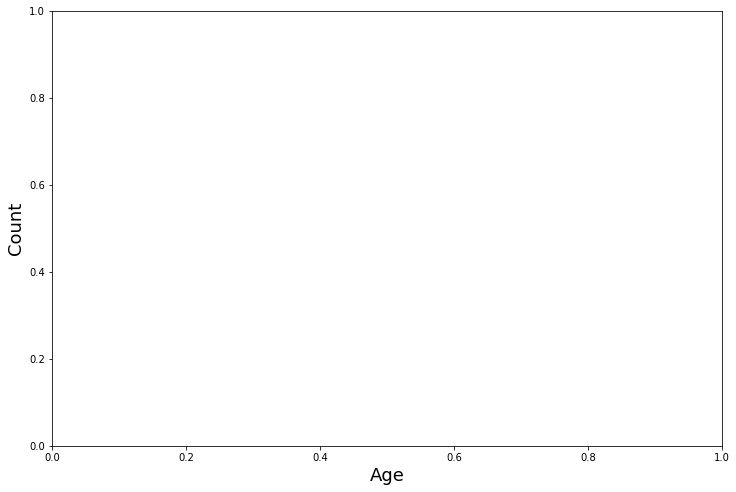

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
df[df['Offender_Age']!='NA'].Offender_Age.hist(bins=50, color= '#2E2E2E')